In [79]:
import pandas as pd
df=pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [80]:
df['old']=df['age'].apply(lambda x: 1 if x>60 else 0)

In [81]:
df['old'].sum()

79

In [82]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [83]:
display(df['age'].min())
df['age'].max()

29

77

In [84]:
norma=pd.DataFrame({'Age_start':[0,21,31,41,51,61], 'Age_end':[20,30,40,50,60,100], 0:['116/72','120/75','127/80','137/84','144/85','159/85'],
1:['123/76','126/79','129/81','135/83','142/85','142/80']})
norma

,Age_start,Age_end,0,1
0,0,20,116/72,123/76
1,21,30,120/75,126/79
2,31,40,127/80,129/81
3,41,50,137/84,135/83
4,51,60,144/85,142/85
5,61,100,159/85,142/80


In [85]:
norma=pd.DataFrame({'Age_start':[0,21,31,41,51,61], 'Age_end':[20,30,40,50,60,100], 0:['116/72','120/75','127/80','137/84','144/85','159/85'],
1:['123/76','126/79','129/81','135/83','142/85','142/80']})

def trestbps_mean(row):
    global norma
    trestbps=norma[(norma['Age_start']<=row['age']) & (norma['Age_end']>=row['age'])][row['sex']].values[0]
    return trestbps


df['trestbps_mean']=df.apply(trestbps_mean, axis=1)


In [86]:
df.iloc[300]


age                  68
sex                   1
cp                    0
trestbps            144
chol                193
fbs                   1
restecg               1
thalach             141
exang                 0
oldpeak             3.4
slope                 1
ca                    2
thal                  3
target                0
old                   1
trestbps_mean    142/80
Name: 300, dtype: object

In [87]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [88]:
df.shape

(303, 16)

In [89]:
import category_encoders as ce

bin_encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'ca', 'thal']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(df[['cp', 'restecg', 'slope', 'ca', 'thal']])
df = pd.concat([df, type_bin], axis=1)
df.shape

(303, 35)

In [90]:
35-16

19

In [91]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0


<AxesSubplot: >

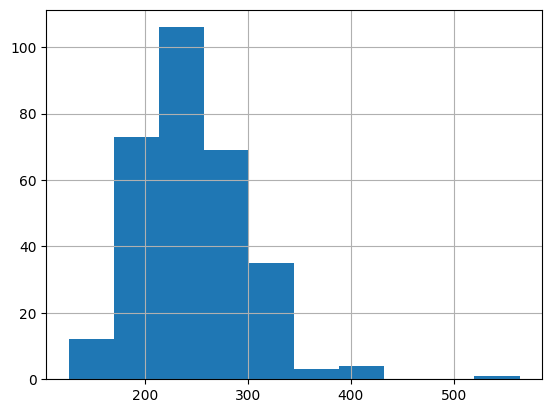

In [92]:
df['chol'].hist()

In [93]:
from sklearn import preprocessing
import seaborn as sns



r_scaler = preprocessing.RobustScaler()
# кодируем исходный датасет
df_r = r_scaler.fit_transform(pd.DataFrame(df['chol']))
df_r = pd.DataFrame(df_r, columns=['chol_'])
df.reset_index(drop= True , inplace= True )#избавляемся от неуникальных индексов
df = pd.concat([df, df_r], axis=1)

In [94]:
df['chol_'].std()

0.8162322990225203

In [95]:
df.corr()

C:\Users\novikova_a\AppData\Local\Temp\ipykernel_16988\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4,chol_
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,...,-0.350844,0.226491,0.179284,0.162243,-0.122378,0.063758,-0.135891,0.110752,-0.016779,0.213678
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,...,-0.122854,-0.020571,0.096673,0.066758,0.088212,0.141135,-0.376365,0.321559,-0.032093,-0.197912
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,...,0.193087,-0.171632,-0.045686,-0.107590,0.054436,-0.073254,0.266947,-0.237760,0.002611,-0.076904
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,...,-0.055011,0.088386,-0.059485,0.080109,0.019059,0.076369,-0.140712,0.109573,-0.016870,0.123174
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,...,-0.080600,0.059887,0.018775,0.098568,-0.095785,-0.093560,-0.004591,0.059621,-0.057127,1.000000
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,...,-0.112548,0.122080,-0.014774,0.075867,0.018754,0.091351,-0.086774,0.030953,0.080568,0.013294
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,...,0.096607,-0.058198,-0.050897,-0.064842,0.067098,-0.013429,0.029597,-0.023012,-0.004356,-0.151040
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,...,0.273136,-0.056905,-0.195502,-0.175506,0.060911,-0.159748,0.294801,-0.215417,-0.050429,-0.009940
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,...,-0.187734,0.097399,0.150206,0.013188,-0.035001,0.063073,-0.328539,0.300223,0.030113,0.067023
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,...,-0.204803,0.218319,-0.011613,0.189296,-0.104998,0.104635,-0.339086,0.302145,-0.037946,0.053952
